FPML 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel(r'F:\FPML/Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

FPML 2 

In [12]:
data= train_data.copy()

In [13]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
def change_to_time(col):
    data[col] = pd.to_datetime(data[col])

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
for colum in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to_time(colum)

In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [20]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [21]:
data['journey_day'] = data['Date_of_Journey'].dt.day

In [22]:
data['journey_month'] = data['Date_of_Journey'].dt.month

In [23]:
data['journey_year'] = data['Date_of_Journey'].dt.year

In [24]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-15 05:50:00,2022-07-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-15 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-07-15 18:05:00,2022-07-15 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-07-15 16:50:00,2022-07-15 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


FPML 3 

In [25]:
data.drop('Date_of_Journey',axis = 1,inplace = True)

In [26]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-07-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-15 05:50:00,2022-07-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [27]:
def separate_hr_min(df,col):
    df[col+'_hr'] = df[col].dt.hour
    df[col+'_min'] = df[col].dt.minute
    df.drop(col,axis = 1,inplace = True)
    return df.head(2)

In [28]:
separate_hr_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hr,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [29]:
separate_hr_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


FPML 4

In [30]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return 'Early Morning'
    elif(x>8) and (x<=12):
        return 'Morning'
    elif(x>12) and (x<=16):
        return 'Noon'
    elif(x>16) and (x<=20):
        return 'Evening'
    elif(x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

<AxesSubplot:>

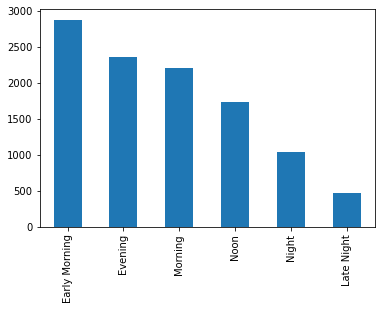

In [31]:
data['Dep_Time_hr'].apply(flight_dep_time).value_counts().plot(kind = 'bar')

In [32]:
##pip install plotly

In [33]:
##pip install cufflinks

In [34]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [35]:
cf.go_offline()

In [36]:
data['Dep_Time_hr'].apply(flight_dep_time).value_counts().iplot(kind = 'bar')

FPML 5

In [37]:
def duration_in_hrmin(x):
    if 'h' not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x+' 0m'
    return x

In [38]:
data['Duration'] = data['Duration'].apply(duration_in_hrmin)

In [39]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [40]:
data['Duration'][0].split(' ')[0]

'2h'

In [41]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [42]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [43]:
data['Duration_hr'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [44]:
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [45]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


FPML 6 

In [46]:
data['Duration_tot_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [47]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_mins,Duration_tot_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


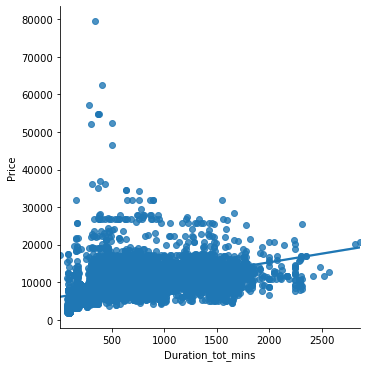

In [48]:
sns.lmplot(x='Duration_tot_mins',y='Price',data=data)

In [49]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:ylabel='Destination'>

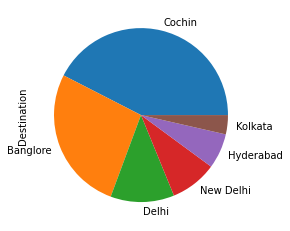

In [50]:
data['Destination'].value_counts().plot(kind='pie')

FPML 7

In [51]:
data['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [52]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [53]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [54]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

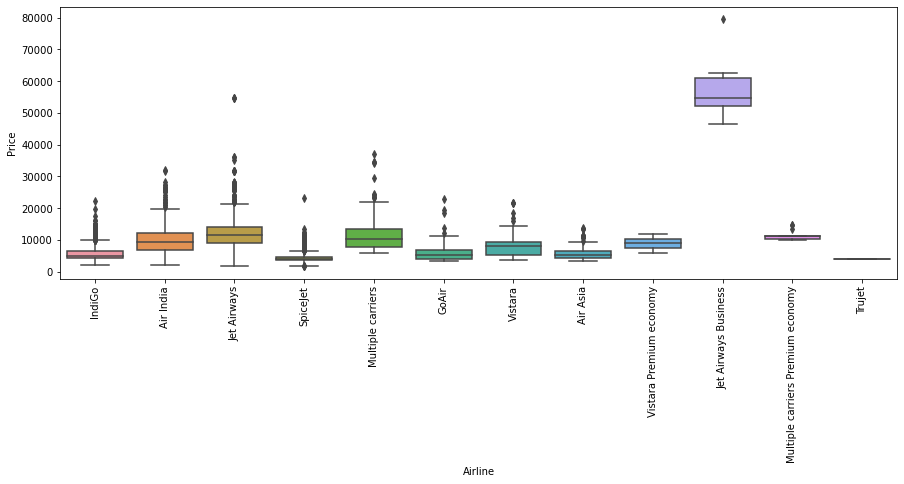

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data = data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

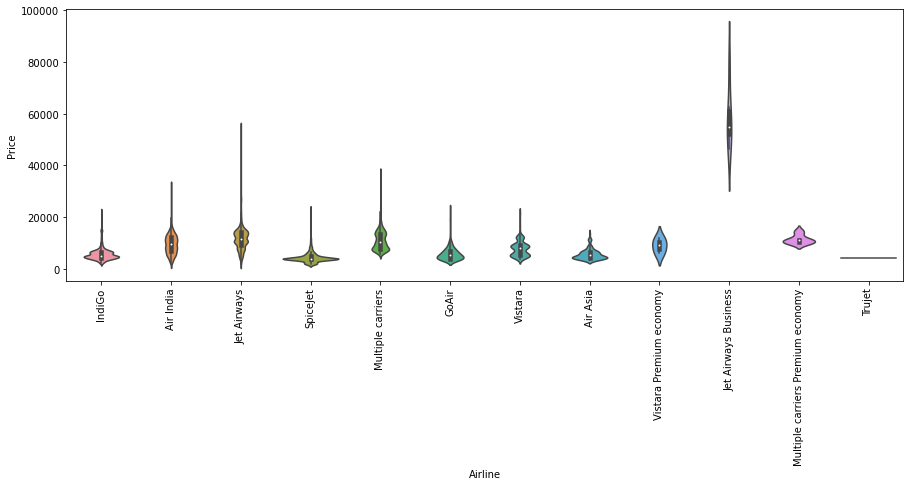

In [56]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data = data)
plt.xticks(rotation='vertical')

FPML 8

In [57]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
2 Long layover                   0.01
Red-eye flight                   0.01
Name: Additional_Info, dtype: float64

In [58]:
data.drop(columns=['Additional_Info','Route','Duration_tot_mins','journey_year'],axis=1,inplace=True)

In [59]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hr', 'Dep_Time_min',
       'Arrival_Time_hr', 'Arrival_Time_min', 'Duration_hr', 'Duration_mins'],
      dtype='object')

In [60]:
data.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [61]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [62]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [63]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [64]:
num_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hr',
 'Dep_Time_min',
 'Arrival_Time_hr',
 'Arrival_Time_min',
 'Duration_hr',
 'Duration_mins']

In [65]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [66]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [67]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [68]:
for category in data['Source'].unique():
    data['Source_'+category] = data['Source'].apply(lambda x: 1 if x==category else 0)

In [69]:
data.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


FPML 9

In [70]:
airline_price_sorted = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [71]:
airline_price_sorted

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [72]:
dict1 = {key:index for index,key in enumerate(airline_price_sorted,0)}

In [73]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [74]:
data['Airline'] = data['Airline'].map(dict1)

In [75]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [76]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [77]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [78]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [79]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [80]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [81]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [82]:
dict2 = {key:index for index,key in enumerate(dest,0)}

In [83]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [84]:
data['Destination'] = data['Destination'].map(dict2)

In [85]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [86]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [87]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [88]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [89]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [90]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

FPML 10

In [91]:
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)
    sns.distplot(df[col],ax = ax3,kde=False)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



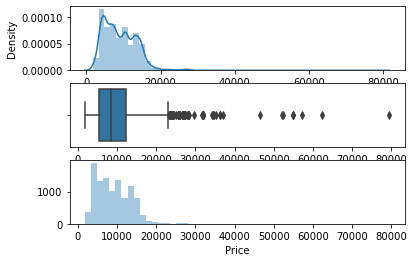

In [92]:
plot(data,'Price')

In [93]:
np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [94]:
data['Price'] = np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



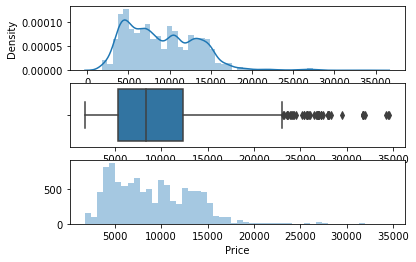

In [95]:
plot(data,'Price')

FPML 11

In [96]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [97]:
data.drop(columns = ['Source','Duration'],axis=1,inplace=True)

In [98]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [99]:
data.dtypes

Airline               int64
Destination           int64
Total_Stops           int64
Price               float64
journey_day           int64
journey_month         int64
Dep_Time_hr           int64
Dep_Time_min          int64
Arrival_Time_hr       int64
Arrival_Time_min      int64
Duration_hr           int64
Duration_mins         int64
Source_Banglore       int64
Source_Kolkata        int64
Source_Delhi          int64
Source_Chennai        int64
Source_Mumbai         int64
dtype: object

In [100]:
from sklearn.feature_selection import mutual_info_regression

In [101]:
x = data.drop(['Price'],axis=1)

In [102]:
y = data['Price']

In [103]:
x.dtypes

Airline             int64
Destination         int64
Total_Stops         int64
journey_day         int64
journey_month       int64
Dep_Time_hr         int64
Dep_Time_min        int64
Arrival_Time_hr     int64
Arrival_Time_min    int64
Duration_hr         int64
Duration_mins       int64
Source_Banglore     int64
Source_Kolkata      int64
Source_Delhi        int64
Source_Chennai      int64
Source_Mumbai       int64
dtype: object

In [104]:
mutual_info_regression(x,y)

array([0.9917504 , 1.01074094, 0.79224326, 0.19227933, 0.24342131,
       0.3354924 , 0.25112251, 0.39595695, 0.34940329, 0.46733759,
       0.35458046, 0.39584535, 0.45472095, 0.52895555, 0.13517749,
       0.19556377])

In [105]:
imp = pd.DataFrame(mutual_info_regression(x,y),index = x.columns)
imp.columns = ['Importance']

In [106]:
imp

,Importance
Airline,0.974631
Destination,1.011733
Total_Stops,0.780743
journey_day,0.193281
journey_month,0.235837
Dep_Time_hr,0.340611
Dep_Time_min,0.264286
Arrival_Time_hr,0.404576
Arrival_Time_min,0.346657
Duration_hr,0.468811


In [107]:
imp.sort_values(by= 'Importance',ascending = False)

,Importance
Destination,1.011733
Airline,0.974631
Total_Stops,0.780743
Source_Delhi,0.531001
Duration_hr,0.468811
Source_Kolkata,0.443683
Arrival_Time_hr,0.404576
Source_Banglore,0.391771
Duration_mins,0.347011
Arrival_Time_min,0.346657


FPML 12 

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
ml_model = RandomForestRegressor()

In [112]:
model = ml_model.fit(x_train,y_train)

In [113]:
y_pred = model.predict(x_test)

In [114]:
y_pred

array([16712.04,  6196.91,  8834.47, ...,  3486.42,  6369.24,  6840.04])

In [115]:
y_pred.shape

(2671,)

In [116]:
len(x_test)

2671

In [117]:
##pip install pickle

In [118]:
import pickle

In [119]:
file = open(r'F:\FPML/rf_random.pkl','wb')

In [120]:
pickle.dump(model,file)

In [121]:
model = open(r'F:\FPML/rf_random.pkl','rb')

In [122]:
forest = pickle.load(model)

In [123]:
forest.predict(x_test)

array([16712.04,  6196.91,  8834.47, ...,  3486.42,  6369.24,  6840.04])

In [124]:
def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [125]:
mape(y_test,forest.predict(x_test))

13.285931404942666

In [127]:
def predict(ml_model):
    model = ml_model.fit(x_train,y_train)
    print('Training Score: {}'.format(model.score(x_train,y_train)))
    y_prediction = model.predict(x_test)
    print('Predictions are: {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training Score: 0.9516799119501683
Predictions are: [16732.97  6334.92  8874.16 ...  3519.12  6159.52  7049.77]


r2_score: 0.8058727773906283
MSE :  3779191.0539210862
MAE :  1188.2559943061951
RMSE :  1944.0141599075573
MAPE :  13.31457900296531


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



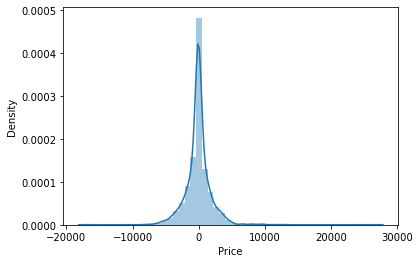

In [128]:
predict(RandomForestRegressor())

In [129]:
from sklearn.model_selection import RandomizedSearchCV

In [130]:
reg_rf = RandomForestRegressor()

In [133]:
np.linspace(start=100,stop = 200,num=6)

array([100., 120., 140., 160., 180., 200.])

In [134]:
n_estimators = [int(x) for x in np.linspace(start=1000,stop = 1200,num=6)]
max_features=["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(start=5,stop = 30,num=4)]
min_samples_split = [5,10,15,20]

In [135]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [136]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 20]}

In [138]:
rf_Random = RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [139]:
rf_Random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [140]:
rf_Random.best_params_

{'n_estimators': 1120,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [141]:
pred2 = rf_Random.predict(x_test)

In [142]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8302560352162665